In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data 

In [4]:
df = data.get_data_tiingo('TSLA',  api_key="3601f79afce502a82f275b485b1e01387c34352d")
df.head()

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


close    high  ...  divCash  splitFactor
symbol date                                       ...                      
TSLA   2017-02-06 00:00:00+00:00  257.77  257.82  ...      0.0          1.0
       2017-02-07 00:00:00+00:00  257.48  260.00  ...      0.0          1.0
       2017-02-08 00:00:00+00:00  262.08  263.36  ...      0.0          1.0
       2017-02-09 00:00:00+00:00  269.20  271.18  ...      0.0          1.0
       2017-02-10 00:00:00+00:00  269.23  270.95  ...      0.0          1.0

[5 rows x 12 columns]

In [5]:
df.tail()

close    high  ...  divCash  splitFactor
symbol date                                       ...                      
TSLA   2022-01-27 00:00:00+00:00  829.10  935.39  ...      0.0          1.0
       2022-01-28 00:00:00+00:00  846.35  857.50  ...      0.0          1.0
       2022-01-31 00:00:00+00:00  936.72  937.99  ...      0.0          1.0
       2022-02-01 00:00:00+00:00  931.25  943.70  ...      0.0          1.0
       2022-02-02 00:00:00+00:00  905.66  931.50  ...      0.0          1.0

[5 rows x 12 columns]

In [6]:
df=df.reset_index()
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2017-02-06 00:00:00+00:00,257.77,257.82,250.63,251.00,3562517,51.554,51.564,50.126,50.200,17812585,0.0,1.0
1,TSLA,2017-02-07 00:00:00+00:00,257.48,260.00,256.42,258.19,4244775,51.496,52.000,51.284,51.638,21223875,0.0,1.0
2,TSLA,2017-02-08 00:00:00+00:00,262.08,263.36,256.20,257.35,3933014,52.416,52.672,51.240,51.470,19665070,0.0,1.0
3,TSLA,2017-02-09 00:00:00+00:00,269.20,271.18,266.15,266.25,7820222,53.840,54.236,53.230,53.250,39101110,0.0,1.0
4,TSLA,2017-02-10 00:00:00+00:00,269.23,270.95,266.11,269.79,3619739,53.846,54.190,53.222,53.958,18098695,0.0,1.0


In [7]:
df = df.drop(['date','symbol','adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],  axis=1)
df.head()

,close,high,low,open,volume
0,257.77,257.82,250.63,251.00,3562517
1,257.48,260.00,256.42,258.19,4244775
2,262.08,263.36,256.20,257.35,3933014
3,269.20,271.18,266.15,266.25,7820222
4,269.23,270.95,266.11,269.79,3619739


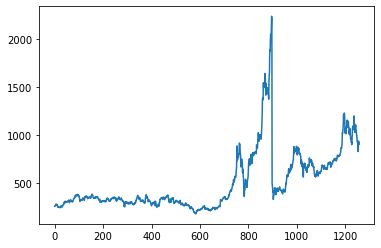

In [8]:
plt.plot(df.close)
plt.show()

In [9]:
df

,close,high,low,open,volume
0,257.77,257.82,250.63,251.00,3562517
1,257.48,260.00,256.42,258.19,4244775
2,262.08,263.36,256.20,257.35,3933014
3,269.20,271.18,266.15,266.25,7820222
4,269.23,270.95,266.11,269.79,3619739
...,...,...,...,...,...
1253,829.10,935.39,829.00,933.36,49036523
1254,846.35,857.50,792.01,831.56,44929650
1255,936.72,937.99,862.05,872.71,34812032
1256,931.25,943.70,905.00,935.21,24379446


In [10]:
#moving average 
ma100=df.close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1253    964.4807
1254    965.4150
1255    967.2435
1256    969.0074
1257    970.7013
Name: close, Length: 1258, dtype: float64

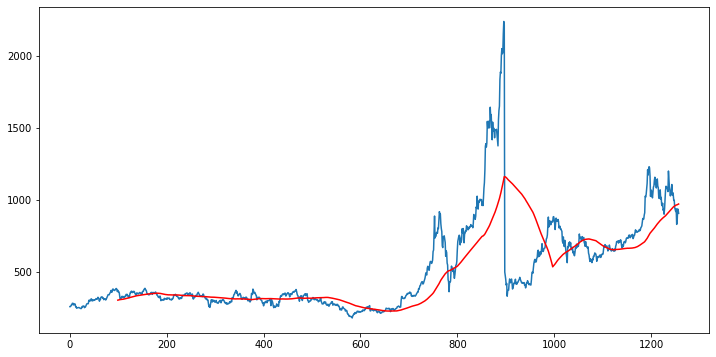

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma100, 'r')

In [29]:
#moving average 
ma200=df.close.rolling(100).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1253    964.4807
1254    965.4150
1255    967.2435
1256    969.0074
1257    970.7013
Name: close, Length: 1258, dtype: float64

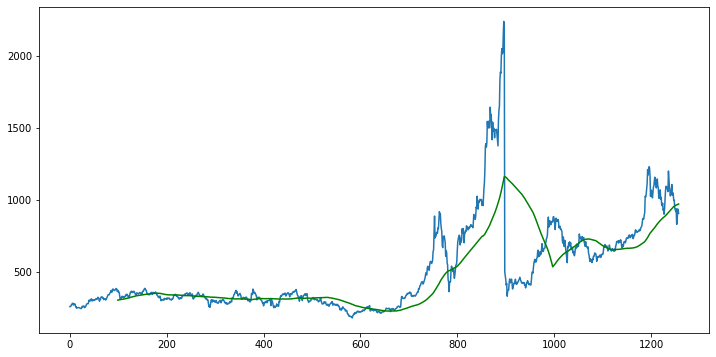

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma200,'g')


In [14]:
df.shape #to find data column and row

(1258, 5)

In [15]:
 #splitting data into training and testing
 training=pd.DataFrame(df['close'][0:int(len(df)*0.7)])
 testing=pd.DataFrame(df['close'][int(len(df)*0.7): int(len(df))])
 print(training.shape)
print(testing.shape)

(880, 1)
(378, 1)


In [16]:
training.head()

,close
0,257.77
1,257.48
2,262.08
3,269.20
4,269.23


In [17]:
testing.head()

,close
880,1485.02
881,1489.58
882,1452.71
883,1418.57
884,1374.39


In [18]:
#scaling down the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
#to convert it into an array
training_array=scaler.fit_transform(training)
print(training_array)

[[0.05382403]
 [0.05362595]
 [0.05676796]
 [0.06163125]
 [0.06165174]
 [0.06941798]
 [0.06967753]
 [0.06884422]
 [0.06146049]
 [0.06370088]
 [0.0672254 ]
 [0.06457518]
 [0.05260821]
 [0.05329809]
 [0.04594168]
 [0.04850993]
 [0.04853043]
 [0.04884463]
 [0.04958915]
 [0.04934325]
 [0.04755367]
 [0.04637883]
 [0.04503323]
 [0.04420674]
 [0.0459007 ]
 [0.05398113]
 [0.05243062]
 [0.05674747]
 [0.0563718 ]
 [0.05665868]
 [0.04898124]
 [0.05193883]
 [0.05178173]
 [0.05750565]
 [0.06232796]
 [0.06726638]
 [0.06721857]
 [0.06758741]
 [0.06784697]
 [0.08165816]
 [0.08519634]
 [0.07925384]
 [0.08178111]
 [0.08440401]
 [0.09113201]
 [0.0886184 ]
 [0.08051065]
 [0.08540126]
 [0.08365266]
 [0.08283983]
 [0.08643949]
 [0.08438352]
 [0.08649413]
 [0.08815393]
 [0.09208828]
 [0.08961565]
 [0.08856376]
 [0.09227953]
 [0.09826301]
 [0.09557181]
 [0.09019624]
 [0.07956804]
 [0.08837251]
 [0.08758017]
 [0.09719063]
 [0.09989549]
 [0.09844744]
 [0.09961545]
 [0.09351584]
 [0.09428769]
 [0.08684248]
 [0.09

In [20]:
training_array.shape

(880, 1)

In [21]:
x_train = []
y_train = []

for i in range(100,training_array.shape[0]):
  x_train.append(training_array[i-100: i])
  y_train.append(training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape

(780, 100, 1)

#ML MODEL

In [23]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [24]:
#model is sequential, then we set up our LSTM LAYERS, Sequential model is a linear stack of layers.
#the units -- poaitive integer that is dimention of the output space, what's going out into the next layer
#so basically even if we have 50 inputs, we will be having 60 outputs
#relu is a common activation unit for convuational layers, 
#Applies the rectified linear unit activation function.
#With default values, this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor.
#return data in sequence == truw
#1,1 to tell Sequential what model to use, in what format 
#dropout layer == we can overtrain our data, so basically it will become rattu tota and ONLY print what it KNOWS, 0 prediction
#20%==0.2 (random) of our neurons are just going to be turned off at all times to train other ones

model = Sequential()
model.add(LSTM(units=50,activation="relu", return_sequences=True, 
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation="relu", return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))

#this is output layer 
model.add(Dense(units=1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
#compiling our data, adam is used as its most common optimizer in big data
#mean squared error = os the error in our model 
#epochs are how many times we are going over the data 
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 12s 276ms/step - loss: 0.0274
Epoch 2/50
25/25 [==============================] - 7s 277ms/step - loss: 0.0073
Epoch 3/50
25/25 [==============================] - 7s 268ms/step - loss: 0.0108
Epoch 4/50
25/25 [==============================] - 9s 381ms/step - loss: 0.0076
Epoch 5/50
25/25 [==============================] - 7s 278ms/step - loss: 0.0058
Epoch 6/50
25/25 [==============================] - 7s 283ms/step - loss: 0.0047
Epoch 7/50
25/25 [==============================] - 7s 279ms/step - loss: 0.0046
Epoch 8/50
25/25 [==============================] - 7s 278ms/step - loss: 0.0041
Epoch 9/50
25/25 [==============================] - 7s 280ms/step - loss: 0.0039
Epoch 10/50
25/25 [==============================] - 7s 278ms/step - loss: 0.0058
Epoch 11/50
25/25 [==============================] - 7s 278ms/step - loss: 0.0046
Epoch 12/50
25/25 [==============================] - 7s 274ms/step - loss: 0.0044
Epoch 13/50
25/25 [=====

In [27]:
model.save('keras_model.h5')

In [28]:
testing.head()

,close
880,1485.02
881,1489.58
882,1452.71
883,1418.57
884,1374.39


In [30]:
training.tail(10)

,close
870,1592.33
871,1513.07
872,1417.00
873,1539.60
874,1476.49
875,1499.11
876,1487.49
877,1430.76
878,1485.00
879,1487.00


In [31]:
past_100_days= training.tail(100)


In [32]:
final_df = past_100_days.append(testing, ignore_index=True)

In [33]:
final_df.tail()

,close
473,829.10
474,846.35
475,936.72
476,931.25
477,905.66


In [34]:
#again scale it down
input_data = scaler.fit_transform(final_df)
input_data

array([[0.11339034],
       [0.06018213],
       [0.05239083],
       [0.01624802],
       [0.05104949],
       [0.05099186],
       [0.05453383],
       [0.09158309],
       [0.10952875],
       [0.10371803],
       [0.09648737],
       [0.09007933],
       [0.10153835],
       [0.07930146],
       [0.06510736],
       [0.07848932],
       [0.09747241],
       [0.11277731],
       [0.11455353],
       [0.12721242],
       [0.16805516],
       [0.19893741],
       [0.20938518],
       [0.2174437 ],
       [0.22199168],
       [0.21804626],
       [0.18679724],
       [0.21057981],
       [0.19670533],
       [0.20693305],
       [0.24549656],
       [0.2299716 ],
       [0.24641873],
       [0.23665734],
       [0.19444706],
       [0.22581659],
       [0.2294948 ],
       [0.23702411],
       [0.23569325],
       [0.25632683],
       [0.25206703],
       [0.25108198],
       [0.2414149 ],
       [0.2478963 ],
       [0.24571662],
       [0.25329309],
       [0.25034843],
       [0.254

In [35]:
input_data.shape

(478, 1)

In [36]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])



In [37]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(378, 100, 1)
(378,)


In [38]:
#Making Predicitions
y_predicted = model.predict(x_test)

In [39]:
y_predicted.shape

(378, 1)

In [40]:
#scale the values back 
scaler.scale_

array([0.00052396])

In [41]:
scale_factor=1/0.00052396
y_predicted= y_predicted* scale_factor
y_test = y_test * scale_factor


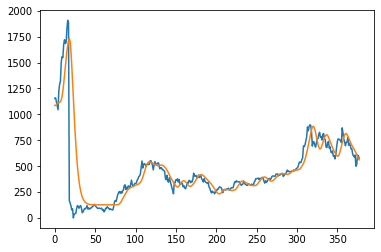

In [42]:
plt.plot(y_test)
plt.plot(y_predicted)
plt.show()
#There are a lot of ways to make this basic graph much better!
#Play with other functions of the plt module and make your graph more appealing. 